<a href="https://colab.research.google.com/github/kelseyneis/data-science-ms/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for reading csv in Colab
from google.colab import files
#uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
import io

# exploratory analysis
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

## exploratory data analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sign       21959 non-null  object
 1   category   21959 non-null  object
 2   date       21959 non-null  int64 
 3   horoscope  21959 non-null  object
dtypes: int64(1), object(3)
memory usage: 686.3+ KB


In [15]:
df['sign'].unique()

array(['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra',
       'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces'],
      dtype=object)

In [16]:
df['category'].unique()

array(['general', 'love', 'career', 'wellness', 'birthday'], dtype=object)

### duplicates

In [17]:
df[df.duplicated()].count()

sign         0
category     0
date         0
horoscope    0
dtype: int64

In [18]:
# 9909 duplicated horoscope texts
df[['horoscope']][ df[['horoscope']].duplicated() ].count()

horoscope    9909
dtype: int64

In [19]:
# categories stay constant with duplicated horoscopes, still 9909
df[['horoscope', 'category']][ df[['horoscope', 'category']].duplicated() ].count()

horoscope    9909
category     9909
dtype: int64

In [20]:
# 109 duplicated horoscopes for the same sign, different date
df[['horoscope', 'sign']][ df[['horoscope', 'sign']].duplicated() ].count()

horoscope    109
sign         109
dtype: int64

### length of horoscopes

In [21]:
df['length'] = df['horoscope'].apply(len)

In [22]:
print(f"Maximum length of horoscope is {max(df['length'])}")
print(f"Minimim length of horoscope is {min(df['length'])}")

Maximum length of horoscope is 952
Minimim length of horoscope is 189


Text(0, 0.5, 'Frequency')

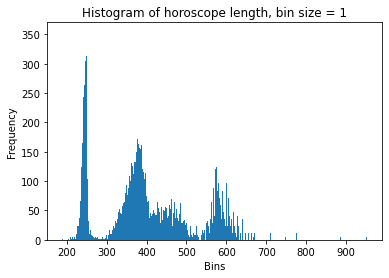

In [23]:
data = list(df['length'])
binsize = 1 # 30
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of horoscope length, bin size = 1')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde1b4b3d10>,
      dtype=object)

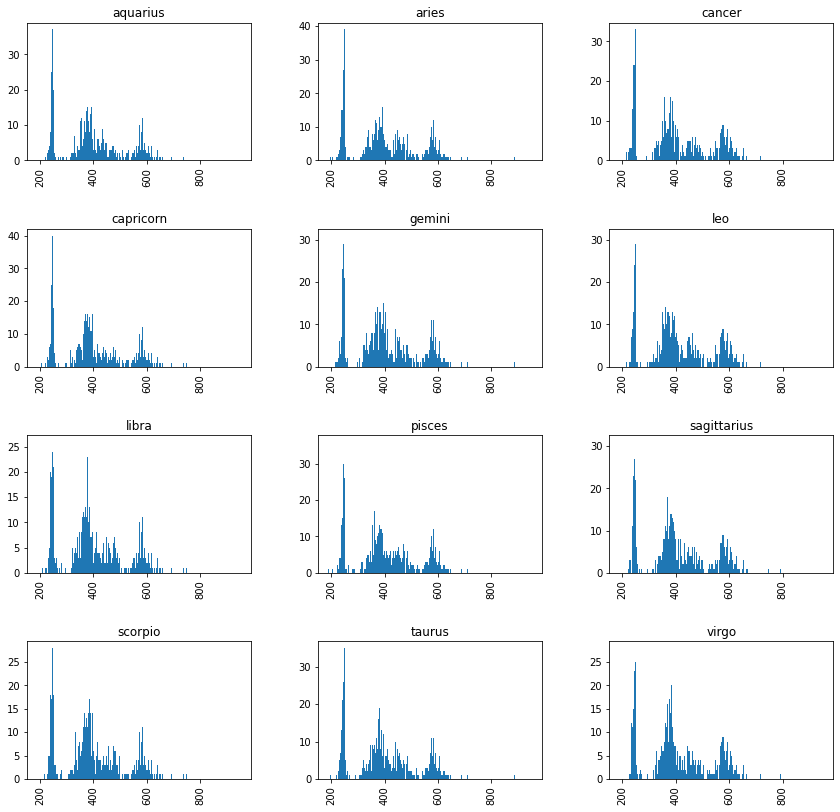

In [24]:
# doesn't change much by sign
binsize = 1
df.hist(column='length', by='sign', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde1b4b3d50>,
      dtype=object)

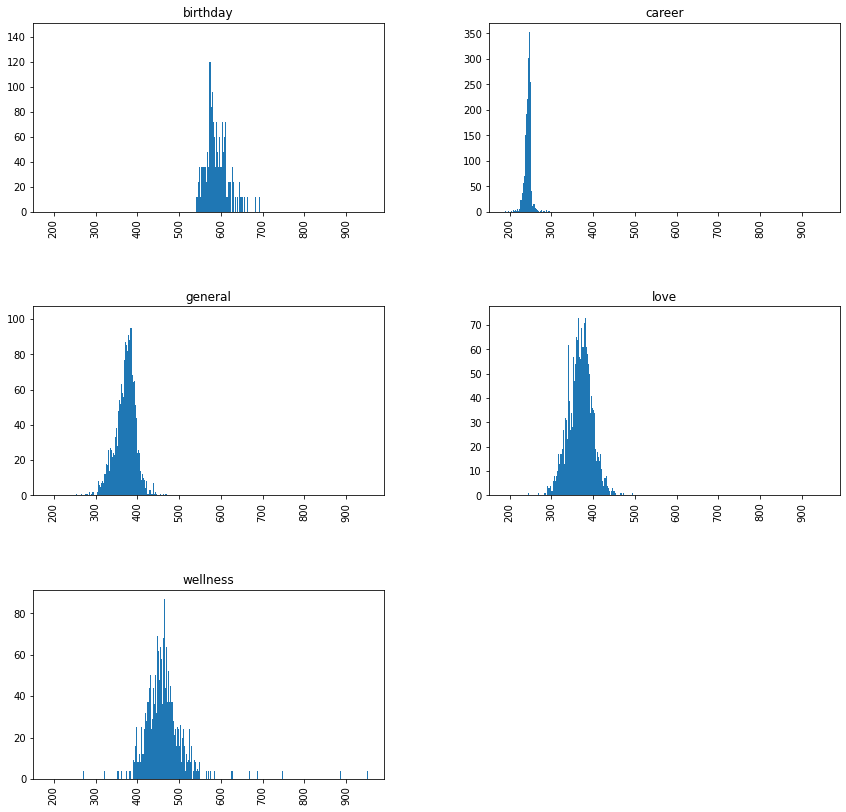

In [25]:
# does change significantly by category: career < general = love < wellness < birthday
binsize = 1
df.hist(column='length', by='category', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,14))

### word count visualizations

In [113]:
all_aries = df[(df['sign'] == 'aries') & (df['category'] == 'birthday')]['horoscope']

In [140]:
# remove punctuation
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

all_aries_tokens = all_aries.apply(lambda x: remove_punctuation(x))

'1463    Instincts and intuition serve you well in publ...\n1464    Career and work come into focus this year Your...\n1465    Its a highenergy year when you could take your...\n1466    Look forward to a year of fun mischief and wil...\n1467    Look and feel your best with more quality time...\nName: horoscope, dtype: object'

In [106]:

# tokenize Aries
tokenizer = RegexpTokenizer(r'\w+')
all_aries_tokens = all_aries_tokens.apply(lambda x: tokenizer.tokenize(x.lower()))


In [111]:
# remove stopwords
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

aries_tokens = all_aries_tokens.apply(lambda x: remove_stopwords(x))

In [142]:
# prepare data for wordcloud

flat_list = [item for sublist in aries_tokens for item in sublist]

'intuition serve well public year dreams wishful thinking career'

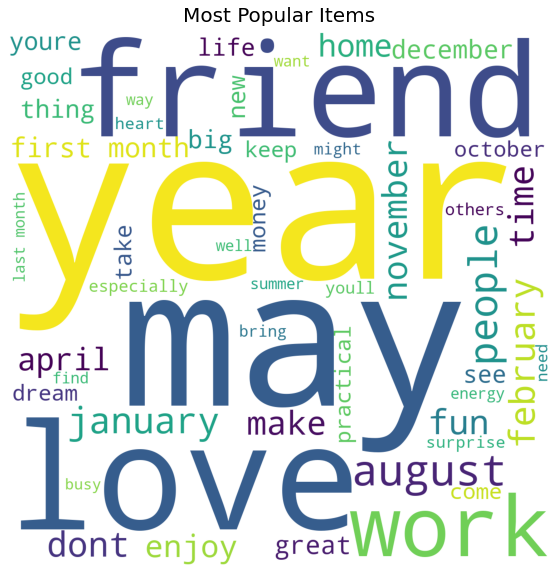

In [143]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50).generate(remove_punctuation(str(flat_list)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()
# TODO: make functions and consider changing where remove_punctuation happens